In [56]:
%load_ext autoreload
%autoreload 2

from math import pi
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

from root_pandas import read_root

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
detector_x = [0, 256.35]
detector_x = [-50, 315]
detector_y = [-116.5, 116.5]
detector_z = [0, 1036.8]

## Useful functions

In [161]:
def point_is_fiducial(x, y, z, fiducial_x=[10, -10], fiducial_y=[20, -20], fiducial_z=[20, -20]):
#     is_x = (detector_x[0] + fiducial_x[0] < df[x]) & (df[x] < detector_x[1] + fiducial_x[1])
    is_y = (detector_y[0] + fiducial_y[0] < df[y]) & (df[y] < detector_y[1] + fiducial_y[1])
    is_z = (detector_z[0] + fiducial_z[0] < df[z]) & (df[z] < detector_z[1] + fiducial_z[1])
    return is_y & is_z

## Load datasets

In [22]:
file_dir = "/home/nick/Desktop/MicroBooNE/StopMuCalibration/data_extbnb_run1_dev_mcc9_beta1_oct_reco_2d_reco2/v1/"
file_list = glob(file_dir+"*/throughmu_ana.root")

In [147]:
df = read_root(file_list, key="throughmu/_trk_tree")

In [148]:
df['start_is_fiducial'] = point_is_fiducial('_trk_start_x', '_trk_start_y', '_trk_start_z')
df['end_is_fiducial'] = point_is_fiducial('_trk_end_x', '_trk_end_y', '_trk_end_z')

In [149]:
df['start_x_fiducial'] = (detector_x[0] + 10 < df['_trk_start_x']) & (df['_trk_start_x'] < detector_x[1] -10)
df['end_x_fiducial'] = (detector_x[0] + 10 < df['_trk_end_x']) & (df['_trk_end_x'] < detector_x[1] -10)

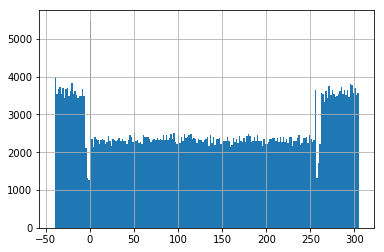

In [160]:
df.query('end_x_fiducial == True')['_trk_end_x'].hist(bins=200)

In [162]:
selected_df = df.query('start_is_fiducial==False & end_is_fiducial==False & _trk_len>50')

In [163]:
dqdx_v = selected_df['_dqdx_v'].values
dqdx_v_flatten = np.hstack(dqdx_v)

rr_v = selected_df['_rr_v'].values
rr_v_flatten = np.hstack(rr_v)

Text(0.5,1,'start is not fiducial, end is fiducial, track len > 50 cm')

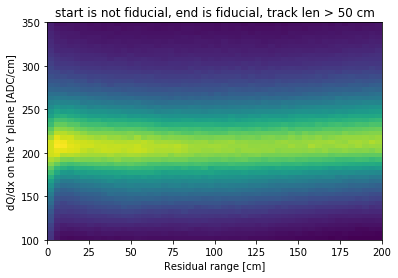

In [164]:
plt.hist2d(x=rr_v_flatten, y=dqdx_v_flatten, 
           bins=[50, 50],
           range=[[0, 200], [100, 350]],
          )
plt.xlabel("Residual range [cm]")
plt.ylabel("dQ/dx on the Y plane [ADC/cm]")
plt.title("start is not fiducial, end is fiducial, track len > 50 cm")